In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime  #To access datetime
from pandas import Series ##To work on series
import warnings ##TO ignore the warinings
warnings.filterwarnings("ignore")

In [54]:
train=pd.read_csv('Train_SU63ISt.csv')
test=pd.read_csv('Test_0qrQsBZ.csv')

In [55]:
train_original=train.copy()  ###to not disturb the original data even after many experimentation
test_original=test.copy()

In [56]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [57]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [58]:
train.shape,test.shape

((18288, 3), (5112, 2))

# FEATURE EXTRACTION


We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [59]:
for i in(train,test,train_original,test_original):
    i['Datetime']=pd.to_datetime(i['Datetime'],format='%d-%m-%Y %H:%M')
#train['Datetime']=pd.to_datetime(train['Datetime',format='%d-%m-%Y %H:%M'])
#test['Datetime']=pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')
#train_original['Datetime']=pd.to_datetime(train_original['Datetime'],format='%d-%m-%Y %H:%M')
#test_original['Datetime']=pd.to_datetime(test_original['Datetime'],format='%d-%m-%Y %H:%M')

We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.

In [60]:
for i in (train,test,train_original,test_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour
    i['minute']=i.Datetime.dt.minute
    

In [61]:
train.head()

,ID,Datetime,Count,year,month,day,hour,minute
0,0,2012-08-25 00:00:00,8,2012,8,25,0,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1,0
2,2,2012-08-25 02:00:00,6,2012,8,25,2,0
3,3,2012-08-25 03:00:00,2,2012,8,25,3,0
4,4,2012-08-25 04:00:00,2,2012,8,25,4,0


We made a hypothesis for the traffic pattern on weekday and weekend as well. So, let’s make a weekend variable to visualize the impact of weekend on traffic.

We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

Values of 5 and 6 represents that the days are weekend

In [62]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

In [63]:
train.head()

,ID,Datetime,Count,year,month,day,hour,minute,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,0,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,0,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,0,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,0,5


Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.

In [64]:
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
    

In [67]:
temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2

In [68]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']

In [69]:
df.head()

,Datetime,Count,year,month,day,hour,minute,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,0,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,0,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,0,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,0,5,1


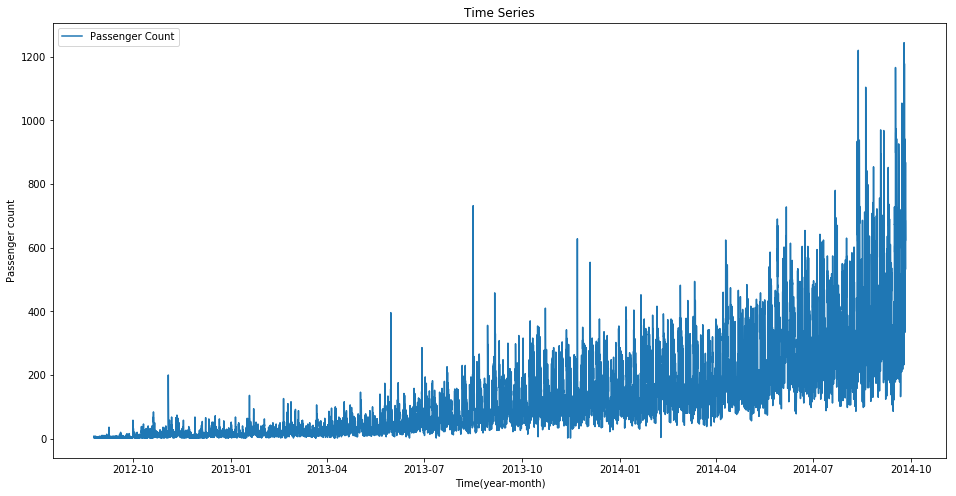

In [70]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

# Lets recall the hypothesis that we made earlier:

Traffic will increase as the years pass by
Traffic will be high from May to October
Traffic on weekdays will be more
Traffic during the peak hours will be high

# Exploratory Analysis

5) Exploratory Analysis
Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

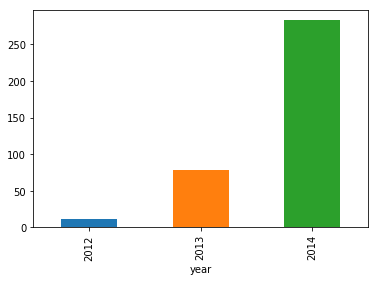

In [16]:
train.groupby('year')['Count'].mean().plot.bar()

In [18]:
train.head()

,ID,Datetime,Count,year,month,day,hour,minute,day of week,weekend
Datetime,,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,0,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,0,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,0,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,0,5,1


In [23]:
train.groupby('year')['Count'].mean()

year
2012     11.282946
2013     78.306849
2014    283.017102
Name: Count, dtype: float64

We see an exponential growth in the traffic with respect to year which validates our hypothesis.

Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

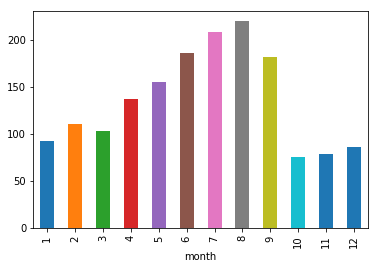

In [22]:
train.groupby('month')['Count'].mean().plot.bar()

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

In [21]:
temp=train.groupby(['year','month'])['Count'].mean()

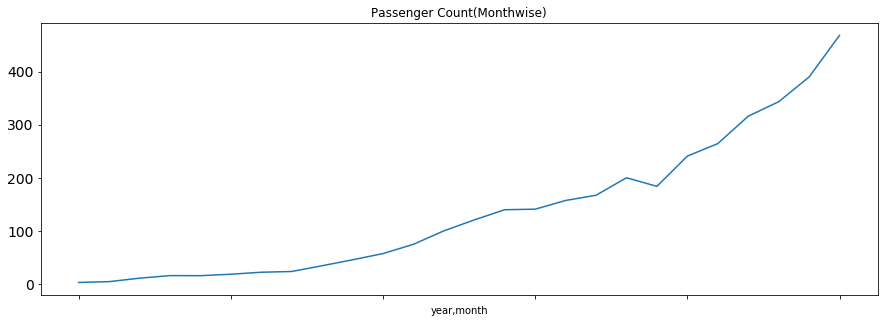

In [20]:
temp=train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

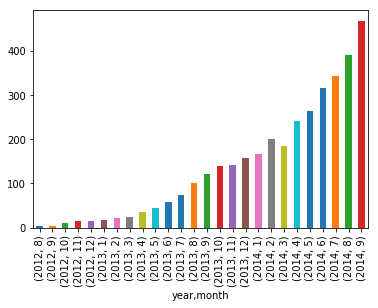

In [19]:
train.groupby(['year','month'])['Count'].mean().plot.bar()

We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.
Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

Let’s look at the daily mean of passenger count.

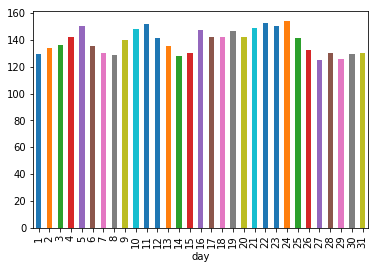

In [24]:
train.groupby('day')['Count'].mean().plot.bar()

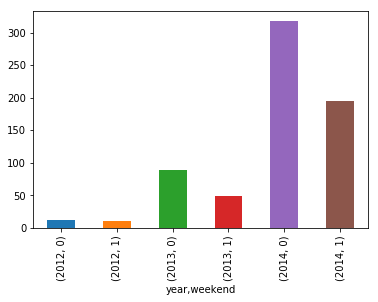

In [26]:
train.groupby(['year','weekend'])['Count'].mean().plot.bar()

In [72]:
train.drop('ID',1,inplace=True)

In [73]:
train.head()

,Datetime,Count,year,month,day,hour,minute,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,0,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,0,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,0,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,0,5,1


In [99]:
# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

#Converting to yearly mean
#yearly=train.resample('Y').mean()

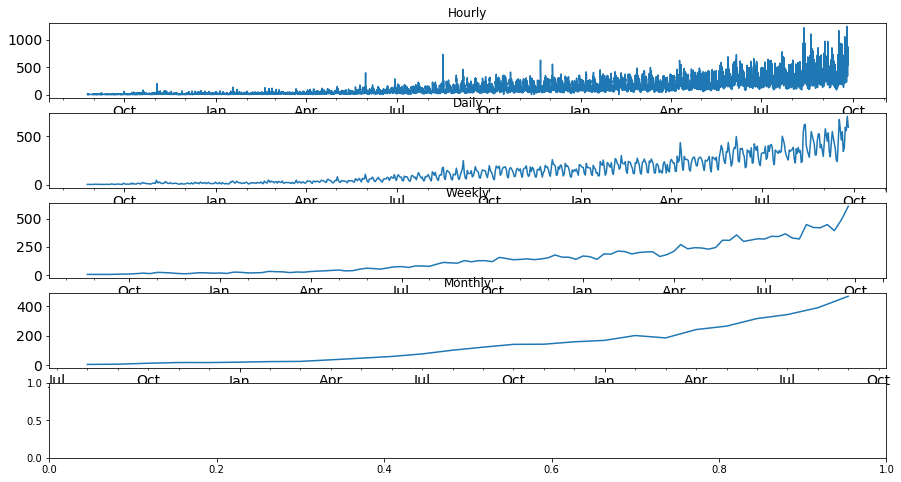

In [100]:
fig, axs = plt.subplots(5,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])
#yearly.Count.plot(figsize=(15,8), tilte= 'Yearly', fontsize=14, ax=axs[4])


1) Splitting the data into training and validation part


Now we will divide our data in train and validation. We will make a model on the train part and predict on the validation part to check the accuracy of our predictions.

NOTE - It is always a good practice to create a validation set that can be used to assess our models locally. If the validation metric(rmse) is changing in proportion to public leaderboard score, this would imply that we have chosen a stable validation technique.

To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [31]:
train['Datetime'].head()

Datetime
2012-08-25 00:00:00   2012-08-25 00:00:00
2012-08-25 01:00:00   2012-08-25 01:00:00
2012-08-25 02:00:00   2012-08-25 02:00:00
2012-08-25 03:00:00   2012-08-25 03:00:00
2012-08-25 04:00:00   2012-08-25 04:00:00
Name: Datetime, dtype: datetime64[ns]

In [32]:
train['Datetime'].tail()

Datetime
2014-09-25 19:00:00   2014-09-25 19:00:00
2014-09-25 20:00:00   2014-09-25 20:00:00
2014-09-25 21:00:00   2014-09-25 21:00:00
2014-09-25 22:00:00   2014-09-25 22:00:00
2014-09-25 23:00:00   2014-09-25 23:00:00
Name: Datetime, dtype: datetime64[ns]

In [33]:
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']

We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data. If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.

Lets understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values based on the future values which is not the case in real scenario. So, this kind of split is used while working with time related problems.

Now we will look at how the train and validation part has been divided.

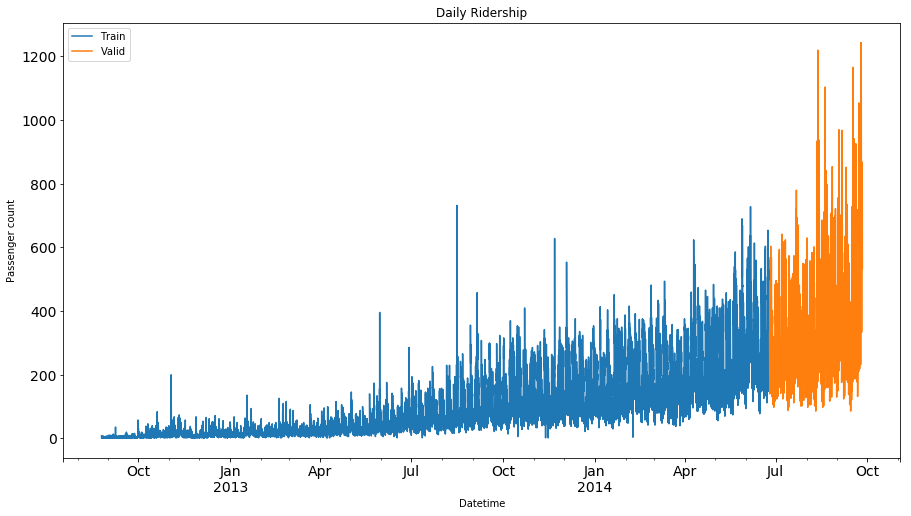

In [40]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='Train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='Valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

Here the blue part represents the train data and the orange part represents the validation data.

We will predict the traffic for the validation part and then visualize how accurate our predictions are. Finally we will make predictions for the test dataset.

# Modeling Techniques
2) Modeling techniques
We will look at various models now to forecast the time series . Methods which we will be discussing for the forecasting are:

i) Naive Approach
ii) Moving Average
iii) Simple Exponential Smoothing
iv) Holt’s Linear Trend Model

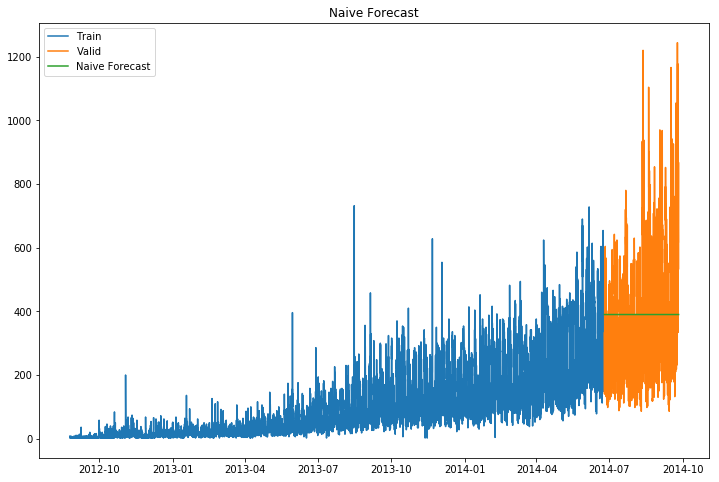

In [96]:
dd= np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
rmse is the standard deviation of the residuals.
Residuals are a measure of how far from the regression line data points are.


We will now calculate RMSE to check the accuracy of our model on validation data set.

In [97]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

186.37368520699056


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

# ii) Moving Average
In this technique we will take the average of the passenger counts for last few time periods only.
Let’s take an example to understand it:

Example


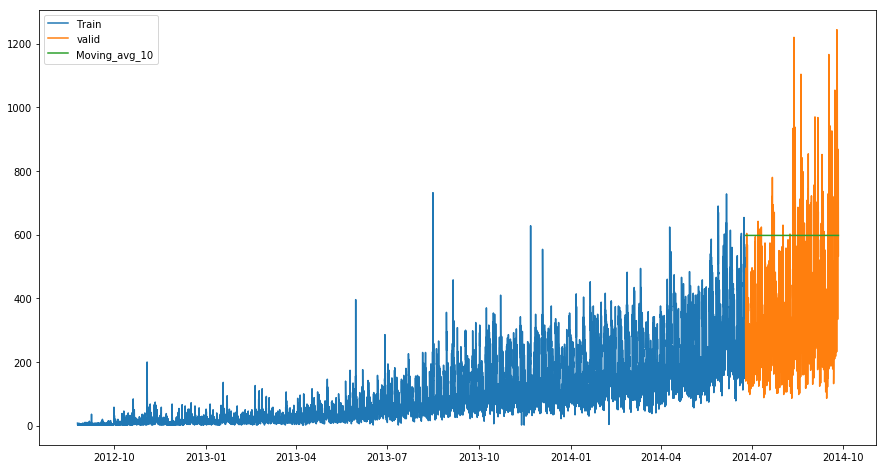

In [88]:
#Last 10 values
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=y_hat['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,8))
plt.plot(Train['Count'],label='Train')
plt.plot(y_hat['Count'],label='valid')
plt.plot(y_hat['moving_avg_forecast'],label='Moving_avg_10')
plt.legend(loc='best')


In [91]:
sqrt(mean_squared_error(valid['Count'],y_hat_avg['moving_avg_forecast']))

334.7785189856027

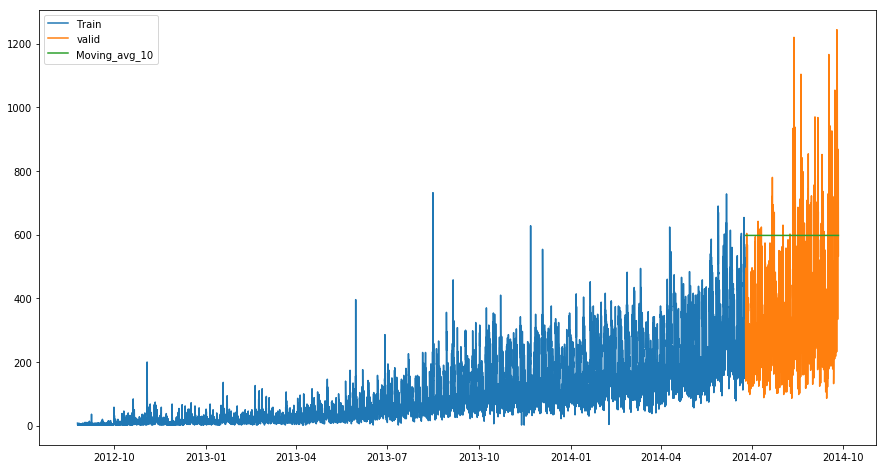

In [86]:
#Last 20 values
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=y_hat['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,8))
plt.plot(Train['Count'],label='Train')
plt.plot(y_hat['Count'],label='valid')
plt.plot(y_hat['moving_avg_forecast'],label='Moving_avg_10')
plt.legend(loc='best')


In [87]:
sqrt(mean_squared_error(valid['Count'],y_hat_avg['moving_avg_forecast']))

279.58363186048837

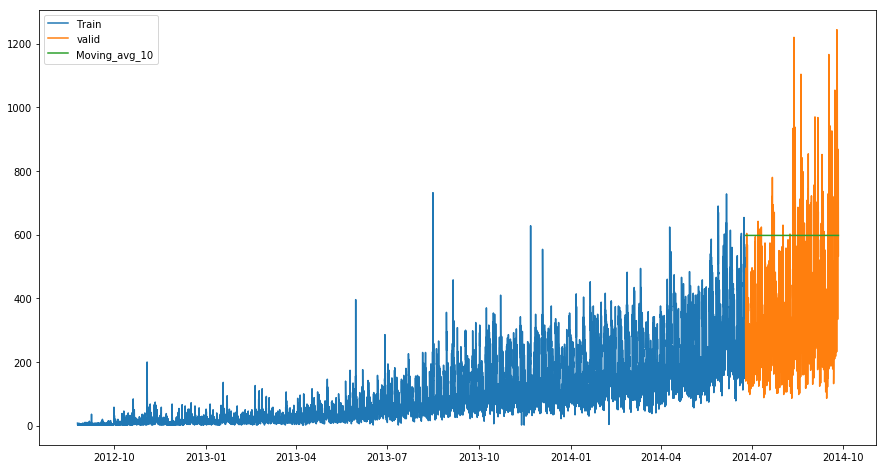

In [84]:
#Last 50 values
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=y_hat['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,8))
plt.plot(Train['Count'],label='Train')
plt.plot(y_hat['Count'],label='valid')
plt.plot(y_hat['moving_avg_forecast'],label='Moving_avg_10')
plt.legend(loc='best')


In [85]:
sqrt(mean_squared_error(valid['Count'],y_hat_avg['moving_avg_forecast']))

316.6427275252404

# iii) Simple Exponential Smoothing
In this technique, we assign larger weights to more recent observations than to observations from the distant past.
The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.


NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

Let’s look at an example of simple exponential smoothing:

Example

Here the predictions are made by assigning larger weight to the recent values and lesser weight to the old values.

In [73]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

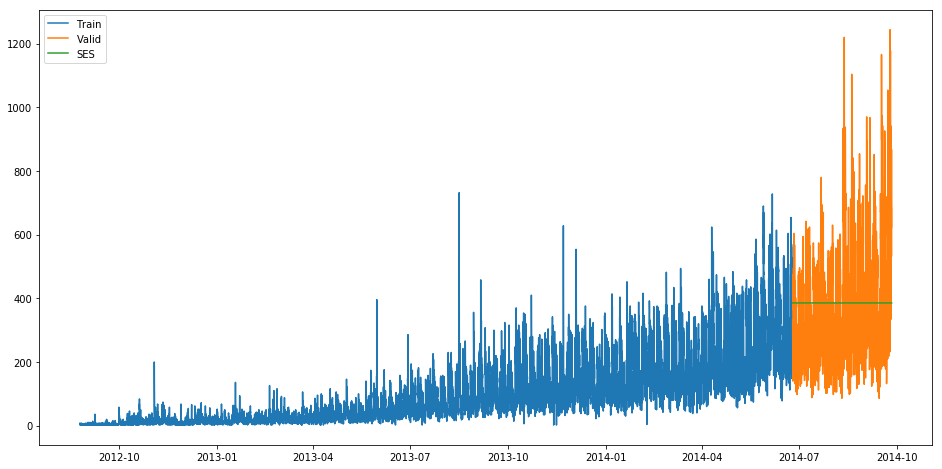

In [94]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [93]:
sqrt(mean_squared_error(valid['Count'],y_hat_avg['SES']))

186.40944652452376

We can infer that the fit of the model has improved as the rmse value has reduced.

# iv) Holt’s Linear Trend Model

It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.
First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.

Observed, which is the original time series.
Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
Seasonal, which tells us about the seasonality in the time series.
Residual, which is obtained by removing any trend or seasonality in the time series.
Lets visualize all these parts.

In [99]:
Train.Count.mean()

104.1578226208271